# Exploratory Data Analysis for Movie Production

In [1]:
#Import Movie data
myfile='movie_metadata.csv'

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import pylab

df = pd.read_csv(myfile,index_col=None)

# Data Wrangling

# 1) Null Values

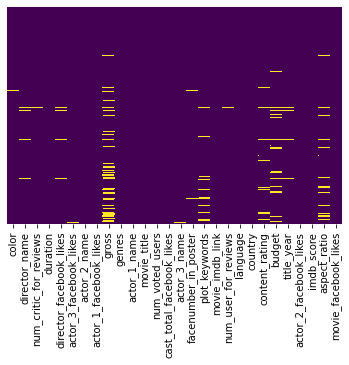

In [2]:
#Identifying frequency of null values in every category
s = sns.heatmap(df.isnull(), yticklabels = False,cbar = False,cmap = 'viridis')

In [3]:
#number of null values in both 'gross' and 'budget'
gross_number = df['gross'].isnull().sum()
budget_number = df['budget'].isnull().sum()

#percentage of values in both 'gross' and 'budget'
gross_percent = round(gross_number/len(df['gross'])*100, 2)
budget_percent = round(budget_number/len(df['gross'])*100, 2)

print('Number of null values in gross: {}'.format(gross_number))
print('Number of null values in budget: {}'.format(budget_number))
print('\n')
print('Percentage of null values in gross: {}%'.format(gross_percent))
print('Percentage of null values in budget: {}%'.format(budget_percent))

Number of null values in gross: 884
Number of null values in budget: 492


Percentage of null values in gross: 17.53%
Percentage of null values in budget: 9.76%


I have produced a heatmap using Seaborn to display the frequency of null values, highlighted in horizontal yellow lines. From the graph we will be focusing on 'gross' and 'budget' given that these are the variables with most null values in our dataset which can lead to inconclusive results.

The values I calculated as the individual proportions of null values for 'gross' and 'budget' categories came to 17.53% and 9.76% respectively. The proportion of 'gross' values are too high and for 'budget' is relatively small, therefore I will delete NaN values and use mean imputation simultaneously, so the data has a balance of variability and sample size making the data more meaningful to draw conclusions from.

# 2) Mean Imputation and Dropping of Null Values

In [4]:
# Replacing null values
df['budget'].mean()
df['clean_budget'] = df['budget'].replace(np.nan, df['budget'].mean())
df['Profit'] = df['gross'] - df['clean_budget']
df.dropna(subset = ['gross'], inplace=True)

# Creating new dataframe with cleaned data
cleaned_data = df.loc[:,['color','title_year','duration','genres','gross','clean_budget','Profit','imdb_score','country','movie_facebook_likes']]
cleaned_data.sort_values('clean_budget',ascending = False).head(15)

,color,title_year,duration,genres,gross,clean_budget,Profit,imdb_score,country,movie_facebook_likes
2988,Color,2006.0,110.0,Comedy|Drama|Horror|Sci-Fi,2201412.0,1.221550e+10,-1.221330e+10,7.0,South Korea,7000
3859,Color,2005.0,112.0,Crime|Drama,211667.0,4.200000e+09,-4.199788e+09,7.7,South Korea,4000
3005,Color,2005.0,134.0,Drama|Romance|War,195888.0,2.500000e+09,-2.499804e+09,7.1,Hungary,607
2323,Color,1997.0,134.0,Adventure|Animation|Fantasy,2298191.0,2.400000e+09,-2.397702e+09,8.4,Japan,11000
2334,Color,2004.0,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,410388.0,2.127520e+09,-2.127110e+09,6.9,Japan,973
3423,Color,1988.0,124.0,Action|Animation|Sci-Fi,439162.0,1.100000e+09,-1.099561e+09,8.1,Japan,0
4542,Color,1999.0,99.0,Action|Adventure|Drama|Sci-Fi|Thriller,10037390.0,1.000000e+09,-9.899626e+08,6.0,Japan,339
3851,Color,1998.0,115.0,Drama|Musical,1687311.0,7.000000e+08,-6.983127e+08,7.2,Spain,539
3075,Color,2006.0,193.0,Drama,3275443.0,7.000000e+08,-6.967246e+08,6.0,India,659
3273,Color,2010.0,90.0,Action|Drama|Romance|Thriller,1602466.0,6.000000e+08,-5.983975e+08,6.0,India,0


Given that the number of null values for 'gross' consist of 17.53% of the overall data I decided to remove the values, alternatively I used mean imputation to replace the null values in 'budget'. This reduces my overall sample size from 5043 to 4159 which reduces the power of my analysis and increases the margin for error. In addition, the use of mean imputation keeps the sample size consistent for 'budget' although the variability in the data is reduced so the standard deviations and variance may be underestimated. 

Furthermore, we can see that the 14 movies with highest budget overall made a significant amount of losses, so a higher budget doesn't necessarily entail a movie will be successful.

# 3) Budgets < £1.5 million

In [21]:
#Selecting budgets less than £1.5 million
veryclean = cleaned_data[cleaned_data['clean_budget'] < 1500000]
veryclean.sort_values('Profit',ascending = False).head()

,color,title_year,duration,genres,gross,clean_budget,Profit,imdb_score,country,movie_facebook_likes
4707,Black and White,1999.0,81.0,Horror,140530114.0,60000.0,140470114.0,6.4,USA,0
4530,Color,1976.0,145.0,Drama|Sport,117235247.0,960000.0,116275247.0,8.1,USA,0
4674,Color,1973.0,112.0,Comedy|Drama|Music,115000000.0,777000.0,114223000.0,7.5,USA,0
4793,Color,2007.0,84.0,Horror,107917283.0,15000.0,107902283.0,6.3,USA,12000
4485,Color,2004.0,103.0,Horror|Mystery|Thriller,55153403.0,1200000.0,53953403.0,7.7,USA,0


Consequently, our sample reduces to 255 movies when only focusing on budgets with less than £1.5 million. The table reveals budgets of less than 1.5 million by descending order of profit. The top 15 movies with highest profit seem to have Horror or containing Horror and Thriller genres which seem to be the most popular genres.

# Normality Check

# 1) Shapiro-Wilk Tests

In [6]:
#shapiro wilk test for budgets less than £1.5 million
budg=stats.shapiro(veryclean['clean_budget'])
print(['Results of test: w and p',budg])
print('\n')
#shapiro wilk test for IMDB Score
IMDB=stats.shapiro(veryclean['imdb_score'])
print(['Results of test: w and p',IMDB])
print('\n')
#shapiro wilk test for profit
Prof=stats.shapiro(veryclean['Profit'])
print(['Results of test: w and p',Prof])

['Results of test: w and p', ShapiroResult(statistic=0.9295369982719421, pvalue=1.1562739654635834e-09)]


['Results of test: w and p', ShapiroResult(statistic=0.971648633480072, pvalue=5.811559094581753e-05)]


['Results of test: w and p', ShapiroResult(statistic=0.40132272243499756, pvalue=3.0711538524204816e-28)]


I've set a criterion alpha value to 0.05 to determine whether our findings are significant or not and a null hypothesis of the data not deviating from a normal distribution. The p-values calculated from the Shapiro-Wilk test are < 0.05 so we reject the null hypothesis, that there isn't enough data for the 3 variables to not be normally distributed.

# 2) Probability Plots

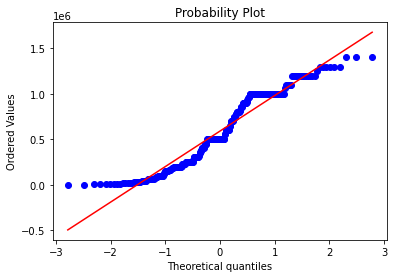

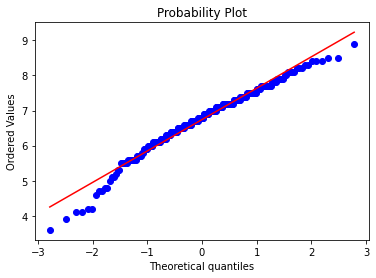

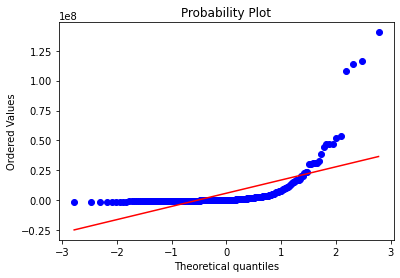

In [7]:
#probability plot of budget
stats.probplot(veryclean['clean_budget'], dist = "norm", plot =pylab)
pylab.show()

#probability plot of IMDB Score
stats.probplot(veryclean['imdb_score'], dist = "norm", plot =pylab)
pylab.show()

#probability plot of profit
stats.probplot(veryclean['Profit'], dist = "norm", plot =pylab)
pylab.show()

From the probability plots we can observe that the first plot of budget follows a jagged linear correlation but with many data points not on the normal distribution line (red line) so it isn't normally distributed. On the other hand, the second plot displaying IMDB score shows a fairly normal distribution given that many points are on the red line with only a few points at each end undervalued. Finally, profit doesn't follow a normal distribution because the data points don't follow the general trend of the red line and many points also fail to lie on the line.

# Data Analysis

# 1) Means of all Movies ≥ £1.5 million

In [8]:
superclean = cleaned_data[cleaned_data['clean_budget'] >= 1500000]
gross_mean1 = round(superclean['gross'].mean(), 0)
budget_mean1 = round(superclean['clean_budget'].mean(), 0)
profit1 = gross_mean1 - budget_mean1

print('Mean of total gross: £{}'.format(gross_mean1))
print('Mean of total budget: £{}'.format(budget_mean1))
print('Average profit made by all movies: £{}'.format(profit1))

Mean of total gross: £51211894.0
Mean of total budget: £47750077.0
Average profit made by all movies: £3461817.0


# 2) Means of Movies with budget of < £1.5 million

In [9]:
gross_mean2 = round(veryclean['gross'].mean(), 0)
budget_mean2 = round(veryclean['clean_budget'].mean(), 0)
profit2 = gross_mean2 - budget_mean2

print('Mean of total gross: £{}'.format(gross_mean2))
print('Mean of total budget: £{}'.format(budget_mean2))
print('Average profit made by all movies: £{}'.format(profit2))
print('\n')
print('Movies with means < £1.5 million made a greater profit by £{}'.format(profit2 - profit1))

Mean of total gross: £6466163.0
Mean of total budget: £590568.0
Average profit made by all movies: £5875595.0


Movies with means < £1.5 million made a greater profit by £2413778.0


It is very interesting to notice that even though average movies with budgets greater than or equal to £1.5 million made more gross than movies with budgets less than £1.5 million. The latter ended up making a greater profit of £2413778.0 showing a smaller budget can make more profit. Although there is a very large difference in the sample sizes which may be an influencing factor in the profits.

# Hypotheses Test : Correlation Analysis

Null Hypothesis - H_0: Gross is dependent on IMDB Score and Budget

Alternative Hypothesis - H_1: Gross is not dependent on IMDB Score and Budget

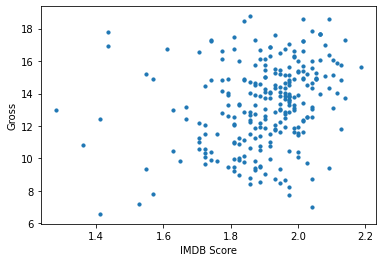

Spearman's correlation coefficient(IMDB Score & Gross):
SpearmanrResult(correlation=0.30141618775949, pvalue=9.385111458813164e-07)


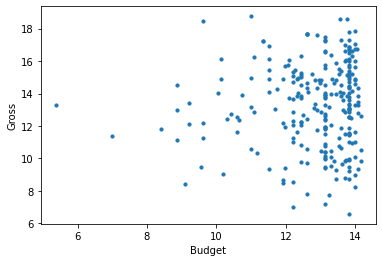

Spearman's correlation coefficient(Budget & Gross):
SpearmanrResult(correlation=0.05622119340007847, pvalue=0.3712806916642786)


In [10]:
w = veryclean['imdb_score']
s = veryclean['clean_budget']
z = veryclean['gross']

t = np.log(w, dtype = 'float64')
r = np.log(s, dtype = 'float64')
q = np.log(z, dtype = 'float64')

#IMDB Score and Gross
plt.scatter(t,q, s = 10)
plt.xlabel('IMDB Score')
plt.ylabel('Gross')
plt.show()

#Spearmens Rank
spearmanr1=stats.spearmanr(w,z)
print("Spearman's correlation coefficient(IMDB Score & Gross):")
print(spearmanr1)

#Budget and Profit
plt.scatter(r,q, s = 10)
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

#Spearmens Rank
spearmanr2=stats.spearmanr(s,z)
print("Spearman's correlation coefficient(Budget & Gross):")
print(spearmanr2)

I scaled down the axis using a logarithmic scale. From the scatter graphs and the correlation coefficients being significantly low, thus there is no linear correlation between gross with budgets and IMDB score. Furthermore, we can see that many of the points in the Gross/Budget graph tend to cluster around a higher budget showing that the upper quartile is close to the max value. This shows that movies with approximately the same budget expenditure have made a gross in a wide interval.

The criterion alpha in this scenario is 0.05 and both p-values are far less than 0.05 so the null hypothesis is rejected, and alternative is accepted so gross is not dependent on either IMDB Score or Budget.

# Box Plots

# 1) Movie Colour

Number of films made in Color: 232
Number of films made in Black and White: 23


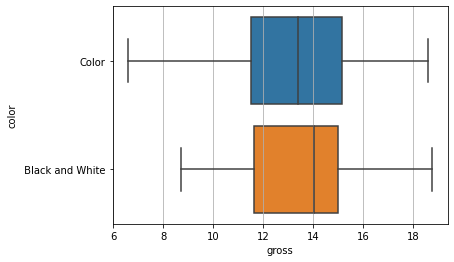

In [11]:
bs = sns.boxplot(x=np.log(veryclean['gross']), y=veryclean['color'],data=veryclean, linewidth=1.5)
bs.xaxis.grid(True)

colour = (veryclean['color']=='Color').sum()
no_colour = 255 - colour

print('Number of films made in Color: {}'.format(colour))
print('Number of films made in Black and White: {}'.format(no_colour))

Another area to consider maybe is the display colour of the movie. From the box plots we can see that movies in Black and White have a higher median and much smaller range than movies in colour but there is a significant difference in their sample sizes so this may not be reliable.

# 2) Country

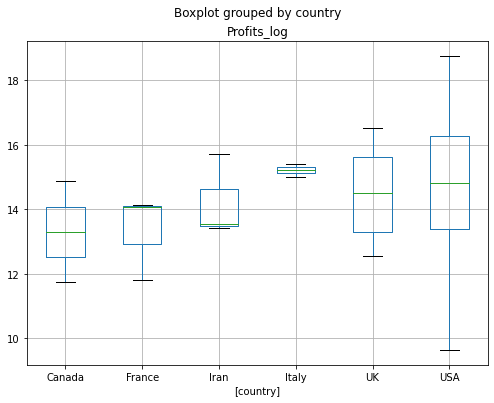

In [12]:
#Use Profits > 0
Positive_Profits = veryclean[veryclean['Profit'] > 0]

#Create new dataframe with log(Profit)
df10 = Positive_Profits.drop(columns = ['Profit'])
Prof_logs = np.log(Positive_Profits['Profit'], dtype = 'float64')
df10['Profits_log'] = Prof_logs

#Comparing country profits
country_Profits=df10.loc[:,['country','Profits_log']]

counts=country_Profits.groupby('country').count().reset_index('country')

#Use countries that have frequencies > 1
n=1
bigcounts=counts[counts.Profits_log>n]['country'] 
bigcountries_df = country_Profits[country_Profits.country.isin(bigcounts)] 
bigcountries_df.boxplot(by='country',figsize=(8,6))

Comparing profits of various countries reveals that the USA has the largest range. Italy has the smallest range of profits but the highest median of all countries where as UK and Canada have very symmetric box plots suggesting normal distribution.

# Genre & Profit Bar chart

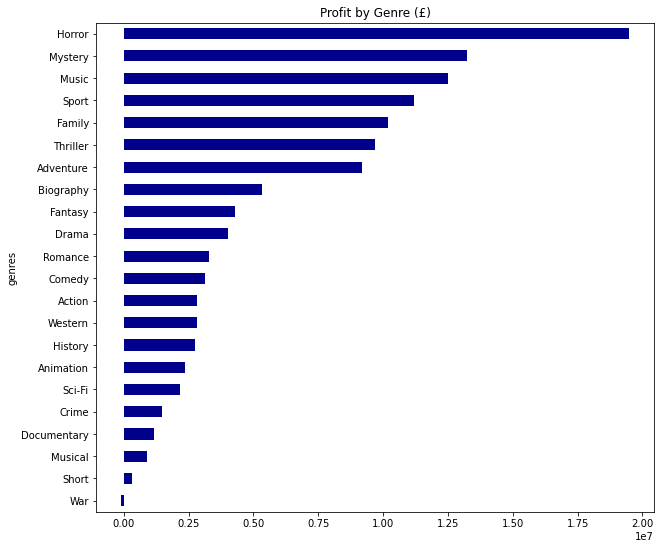

In [13]:
#Split the movies with multiple genres
s = veryclean['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del veryclean['genres']
veryclean_split_genres = veryclean.join(s)

#Group the separate genres
veryclean_genre_mean = veryclean_split_genres.groupby(['genres']).mean()

#Sort in ascending order of profit made
veryclean_genre_mean.sort_values('Profit', ascending=True, inplace = True )
veryclean_genre_mean['Profit'].plot.barh(stacked=False, title = 'Profit by Genre (£)',color='DarkBlue', figsize=(10, 9));

I separated the movies with multiple genres for each movie into single genres, then grouped the mean profits made by each genre in ascending order. From the bar chart we can see that horror does made the most profit but with mystery sequentially afterward instead of Thriller as I speculated earlier in the report. The range of the profits differ significantly as the War genre made very little profit.

# Summary

I explored the data in the movie data set to discover movies with the highest profits, given a budget of less than £1.5 million. After identifying and filtering out null values in the data, I tested to see if my variables are normally distributed using statistical methods, so I can understand where the values lie around the mean. Then I used correlation analysis to see if gross had any linear relationship to IMDB Score or Budget. My investigation led me to discover there is no linear relationship with the variables and are independent of each other.

I then produced box plots comparing color and gross where I found that Black and White movies had a higher median than movies in colour. The Black and White shows characteristics of a negative skew as the median is closer to the upper quartile whereas the color box plot is fairly symmetric.

My analysis has shown me that the projected movie with most success with a budget less than £1.5 million has a Horror genre released in Italy as horror genre made the most profit out of all profits, also Italy has fairly consistent profit range. Finally, the movie should be made in black and white for maximum profit. However, my data is likely to have been influenced by the sample size of many discrete variables I have used so this is something to consider and the ideal movie I described my not be the best suggestion.

In [14]:
import io
import os
from nbformat import current

total_markdown = 0
total_heading = 0
total_code = 0

for root, dirs, files in os.walk("."):
    for file in files:
        if file.endswith(".ipynb") and not file.endswith("checkpoint.ipynb") :
            #print(os.path.join(root, file))
            with io.open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                nb = current.read(f, 'json')

            word_count_markdown = 0
            word_count_heading = 0
            word_count_code = 0
            for cell in nb.worksheets[0].cells:
                if cell.cell_type == "markdown":
                    word_count_markdown += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "heading":
                    word_count_heading += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "code":
                    word_count_code += len(cell['input'].replace('#', '').lstrip().split(' '))
            total_markdown += word_count_markdown
            total_heading += word_count_heading
            total_code += word_count_code

print("{} Words in notebooks' markdown" .format(total_markdown))
print("{} Words in notebooks' heading" .format(total_heading))
print("{} Words in notebooks' code" .format(total_code))

1062 Words in notebooks' markdown
85 Words in notebooks' heading
928 Words in notebooks' code


/Users/faheemshahin/opt/anaconda3/lib/python3.8/site-packages/nbformat/current.py:15: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  warnings.warn("""nbformat.current is deprecated.
